<a href="https://colab.research.google.com/github/mryodo/sun.activity/blob/master/python/vpd/reconstruction/cor_test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.optimize import fsolve
from math import *
from scipy.signal import argrelextrema
from imp import reload 

%matplotlib inline

import vpdSolver
reload(vpdSolver)

import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})

import pandas as pd

In [0]:
df=pd.read_csv('aaindex', header=None)
aa_d=np.apply_along_axis(lambda x: x[0][33:37] ,1,df.values)[:-1].astype(float)
df=pd.read_csv('SN_d_tot_V2.0.csv', header=None, delimiter=';')
#df.values[18262:, :]
wolf_d=df.values[18262:70492, 4]
t_d=np.arange(1868.0, 1868.0+wolf_d.shape[0]/365.25, 1/365.25)

In [0]:
N_grid=t_d.shape[0]
p=365
st=int(p/2)
fn=N_grid-1-st

In [0]:
wolf=np.array([np.mean(wolf_d[max(i-int(p/2),0):min(i+int(p/2), N_grid)]) for i in range(N_grid)])
aa=np.array([np.mean(aa_d[max(i-int(p/2),0):min(i+int(p/2), N_grid)]) for i in range(N_grid)])
t=t_d

wolf_sq=np.power(wolf, 1/2)
N_grid=t.shape[0]
p=365*11+2

C_0=np.array([np.corrcoef(wolf_sq[max(i-int(p/2),0):min(i+int(p/2), N_grid)], aa[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
    for i in range(N_grid)])

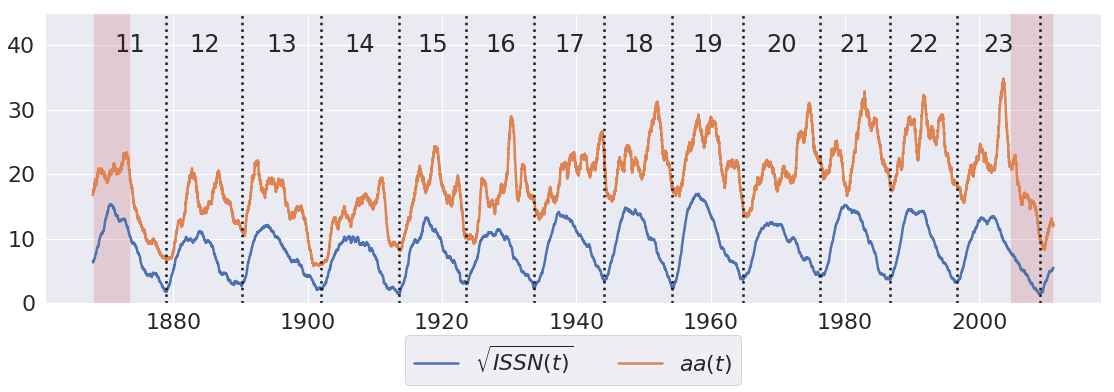

In [6]:

fig=plt.figure(figsize=(16, 6))
ax=plt.gca()
plt.plot(t_d, wolf_sq, label=r'$\sqrt{ISSN(t)}$')
plt.plot(t_d, aa, label='$aa(t)$')


cycles=np.array([
    1878+11.5/12, 1890+2.5/12, 1902+0.5/12, 1913+6.5/12, 1923+7.5/12, 
    1933+8.5/12, 1944+1.5/12, 1954+3.5/12, 1964+9.5/12, 1976+2.5/12, 1986+8.5/12, 1996+7.5/12, 2008+11.5/12
])
for cycle in cycles:
    plt.axvline(x=cycle, color='k', linestyle='dotted')

cycles_tmp=np.array([
    1868, 1878+11.5/12, 1890+2.5/12, 1902+0.5/12, 1913+6.5/12, 1923+7.5/12, 
    1933+8.5/12, 1944+1.5/12, 1954+3.5/12, 1964+9.5/12, 1976+2.5/12, 1986+8.5/12, 1996+7.5/12, 2008+11.5/12
])    
    
for i in range(cycles_tmp.shape[0]-1):
    plt.text(0.5*(cycles_tmp[i]+cycles_tmp[i+1]), 40, str(11+i), horizontalalignment='center', verticalalignment='center')
    
plt.axvspan(1868, 1873.5, facecolor='r', alpha=0.2)
plt.axvspan(2004.5, 2011, facecolor='r', alpha=0.2)
plt.ylim((0, 45))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=2)
plt.tight_layout()
#plt.savefig('oscillators.png', format='png')
#ax.set_rasterization_zorder(1) 
#plt.savefig('oscillators.pdf')

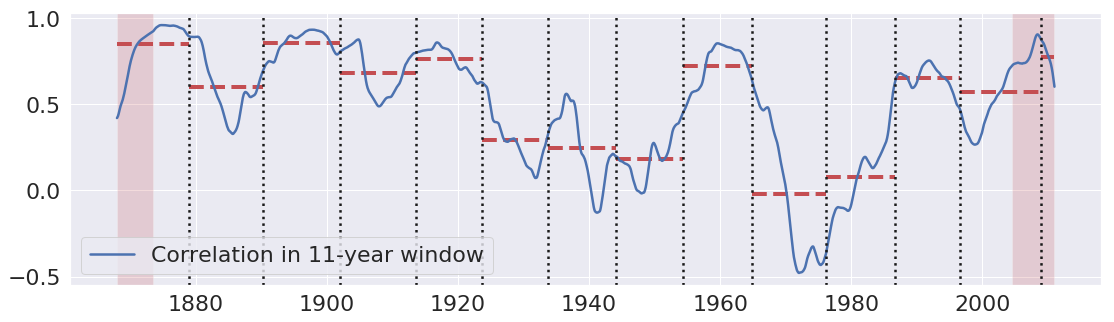

In [7]:
plt.figure(figsize=(16,5))
plt.plot(t, C_0, label='Correlation in 11-year window')

#i=0
#p=365*11+2
#C_target=[]
#while (1868+i<=2011):
#    plt.hlines(y=np.mean(C_0[p*(i//11):p*(i//11)+p]), xmin=1868+i, xmax=min(1868+i, 2011), color='r', linestyle='--', linewidth=4)
#    plt.axvline(x=1868+i, color='k', linestyle='dotted')
    
#    C_target.append(np.mean(C_0[p*(i//11):p*(i//11)+p]))
#    i+=11
for cycle in cycles:
    plt.axvline(x=cycle, color='k', linestyle='dotted')

cycles_tmp=np.array([
    1868, 1878+11.5/12, 1890+2.5/12, 1902+0.5/12, 1913+6.5/12, 1923+7.5/12, 
    1933+8.5/12, 1944+1.5/12, 1954+3.5/12, 1964+9.5/12, 1976+2.5/12, 1986+8.5/12, 1996+7.5/12, 2008+11.5/12, 2011
])

ind=np.array([ np.where(t<=cycles_tmp[i])[0][-1] for i in range(cycles_tmp.shape[0])])
C_target=[]
for i in range(ind.shape[0]-1):
    C_target.append(np.mean(C_0[ind[i]:ind[i+1]]))
    plt.hlines(y=C_target[-1], xmin=cycles_tmp[i], xmax=cycles_tmp[i+1], color='r', linestyle='--', linewidth=4)

plt.axvspan(1868, 1873.5, facecolor='r', alpha=0.2)
plt.axvspan(2004.5, 2011, facecolor='r', alpha=0.2)
plt.legend()
plt.tight_layout()
#plt.savefig('cor_target.pdf')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

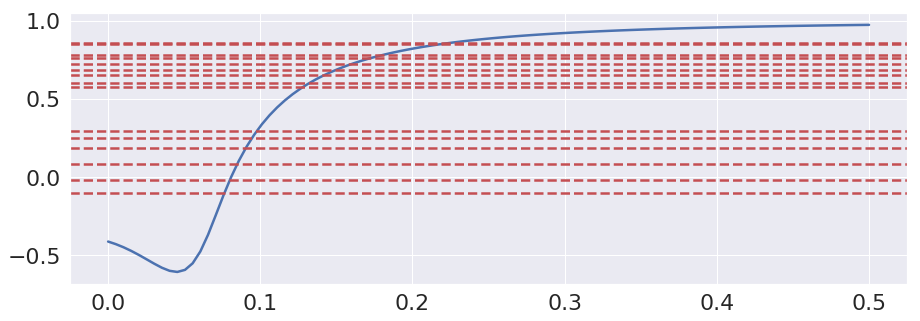

In [0]:
dw=0.1

#!!!!
C_target.append(-0.1)

num=100
d_series=np.linspace(0, 0.5, num)
T_series=[]
C_series=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=7500
    n=15
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    
    print(i, end=' ')
    T_series.append(T)
    C_series.append(np.mean(C_0_cur[-5000:]))
    
plt.figure(figsize=(15,5))
plt.plot(d_series, C_series)
for i in range(len(C_target)):
    plt.axhline(y=C_target[i], color='r', linestyle='--')
    
d_target=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series)-1):
        if (C_target[i]>=C_series[j]) and (C_target[i]<=C_series[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    d_target.append(max(d_target_cur))

    
dw=0.1

num=100
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series2=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=15000
    n=30
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    
    print(i, end=' ')
 #   T_series.append(T)
    C_series2.append(np.mean(C_0_cur[-5000:]))
    
d_target2=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series2)-1):
        if (C_target[i]>=C_series2[j]) and (C_target[i]<=C_series2[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target2.append(np.nan)
    else:
        d_target2.append(max(d_target_cur))

    
dw=0.1

num=100
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series3=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=30000
    n=60
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series3.append(np.mean(C_0_cur[-5000:]))
    
d_target3=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series3)-1):
        if (C_target[i]>=C_series3[j]) and (C_target[i]<=C_series3[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target3.append(np.nan)
    else:
        d_target3.append(max(d_target_cur))

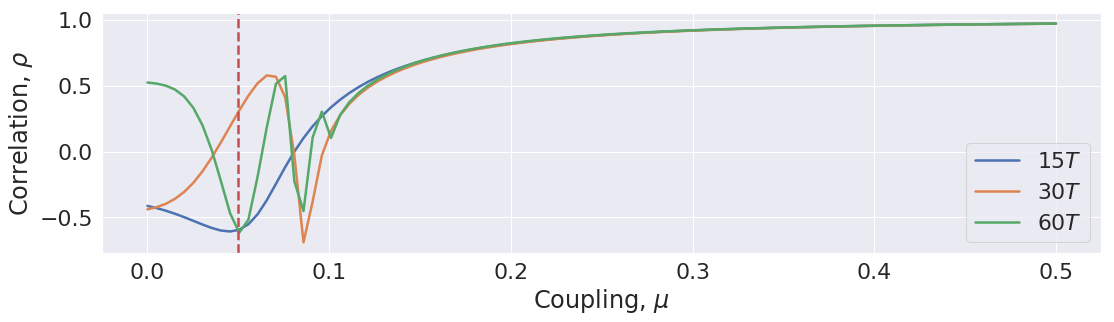

In [0]:
plt.figure(figsize=(16,5))
plt.plot(d_series, C_series, label=r'$15T$')
plt.plot(d_series, C_series2, label=r'$30T$')
plt.plot(d_series, C_series3, label=r'$60T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.05, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()
#plt.savefig('cor_mu.pdf')

In [0]:
dw=0.1

num=100
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series4=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=60000
    n=120
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series4.append(np.mean(C_0_cur[-5000:]))
    
d_target4=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series4)-1):
        if (C_target[i]>=C_series4[j]) and (C_target[i]<=C_series4[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target4.append(np.nan)
    else:
        d_target4.append(max(d_target_cur))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

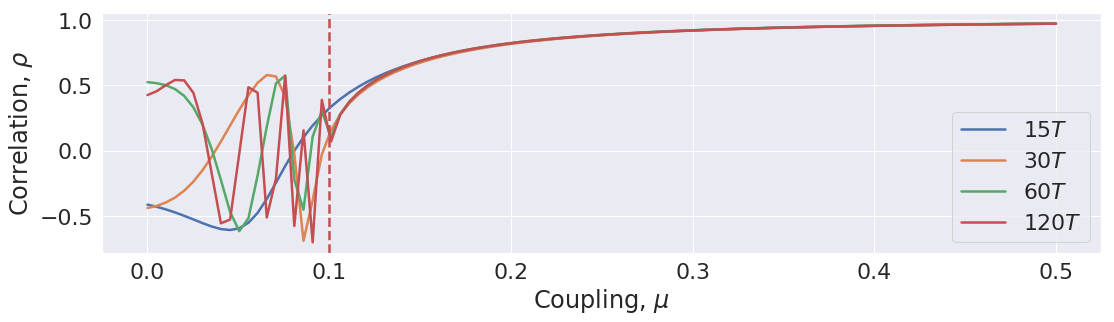

In [0]:
plt.figure(figsize=(16,5))
plt.plot(d_series, C_series, label=r'$15T$')
plt.plot(d_series, C_series2, label=r'$30T$')
plt.plot(d_series, C_series3, label=r'$60T$')
plt.plot(d_series, C_series4, label=r'$120T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.1, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

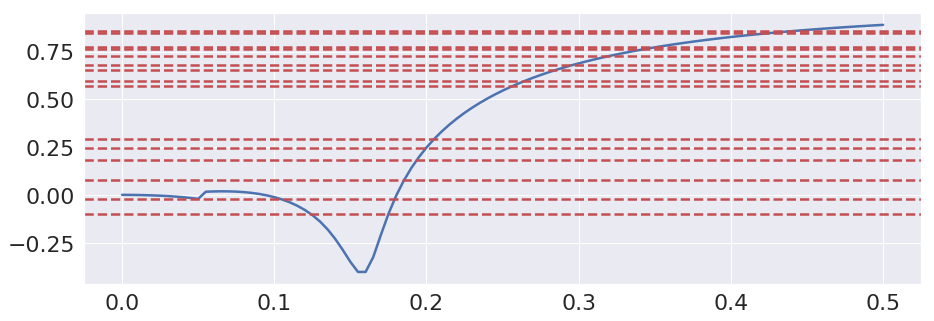

In [8]:
dw=0.2

#!!!!
C_target.append(-0.1)

num=101
d_series=np.linspace(0, 0.5, num)
T_series=[]
C_series=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=7500
    n=15
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
    T_series.append(T)
    C_series.append(np.mean(C_0_cur))
    
plt.figure(figsize=(15,5))
plt.plot(d_series, C_series)
for i in range(len(C_target)):
    plt.axhline(y=C_target[i], color='r', linestyle='--')
    
d_target=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series)-1):
        if (C_target[i]>=C_series[j]) and (C_target[i]<=C_series[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    d_target.append(max(d_target_cur))

    
dw=0.2

num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series2=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=15000
    n=30
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
 #   T_series.append(T)
    C_series2.append(np.mean(C_0_cur))
    
d_target2=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series2)-1):
        if (C_target[i]>=C_series2[j]) and (C_target[i]<=C_series2[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target2.append(np.nan)
    else:
        d_target2.append(max(d_target_cur))

    
dw=0.2

num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series3=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=30000
    n=60
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series3.append(np.mean(C_0_cur))
    
d_target3=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series3)-1):
        if (C_target[i]>=C_series3[j]) and (C_target[i]<=C_series3[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target3.append(np.nan)
    else:
        d_target3.append(max(d_target_cur))

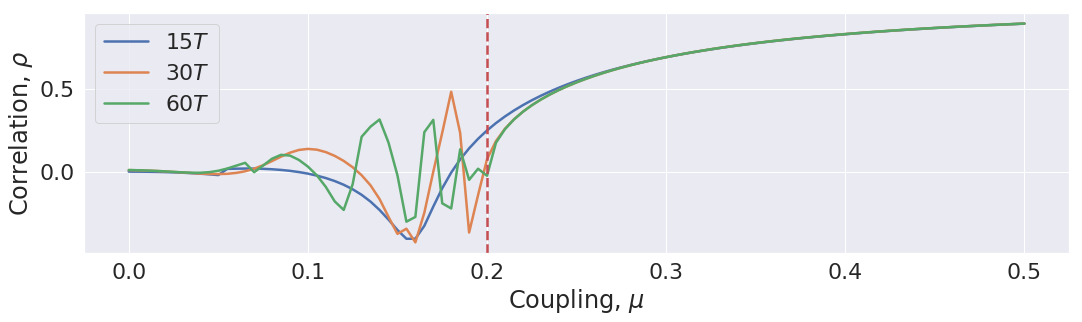

In [9]:
plt.figure(figsize=(16,5))
plt.plot(d_series, C_series, label=r'$15T$')
plt.plot(d_series, C_series2, label=r'$30T$')
plt.plot(d_series, C_series3, label=r'$60T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()
#plt.savefig('cor_mu.pdf')

In [10]:
dw=0.2

num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series4=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=60000
    n=120
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series4.append(np.mean(C_0_cur[:]))
    
d_target4=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series4)-1):
        if (C_target[i]>=C_series4[j]) and (C_target[i]<=C_series4[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target4.append(np.nan)
    else:
        d_target4.append(max(d_target_cur))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

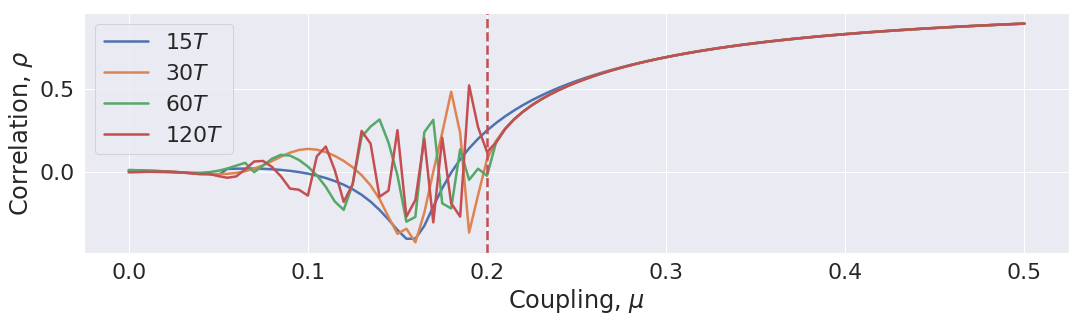

In [11]:
plt.figure(figsize=(16,5))
plt.plot(d_series, C_series, label=r'$15T$')
plt.plot(d_series, C_series2, label=r'$30T$')
plt.plot(d_series, C_series3, label=r'$60T$')
plt.plot(d_series, C_series4, label=r'$120T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()


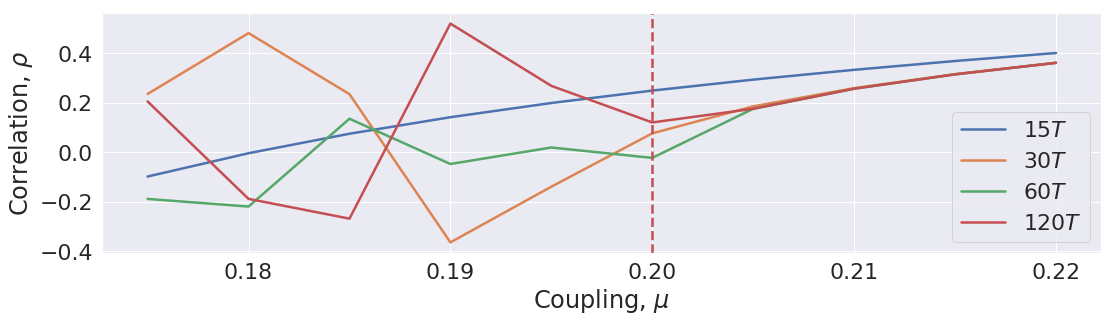

In [12]:
plt.figure(figsize=(16,5))
plt.plot(d_series[35:45], C_series[35:45], label=r'$15T$')
plt.plot(d_series[35:45], C_series2[35:45], label=r'$30T$')
plt.plot(d_series[35:45], C_series3[35:45], label=r'$60T$')
plt.plot(d_series[35:45], C_series4[35:45], label=r'$120T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()


In [13]:
dw=0.2

num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series5=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=120000
    n=240
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series5.append(np.mean(C_0_cur[-5000:]))
    
d_target5=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series5)-1):
        if (C_target[i]>=C_series5[j]) and (C_target[i]<=C_series5[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target5.append(np.nan)
    else:
        d_target5.append(max(d_target_cur))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

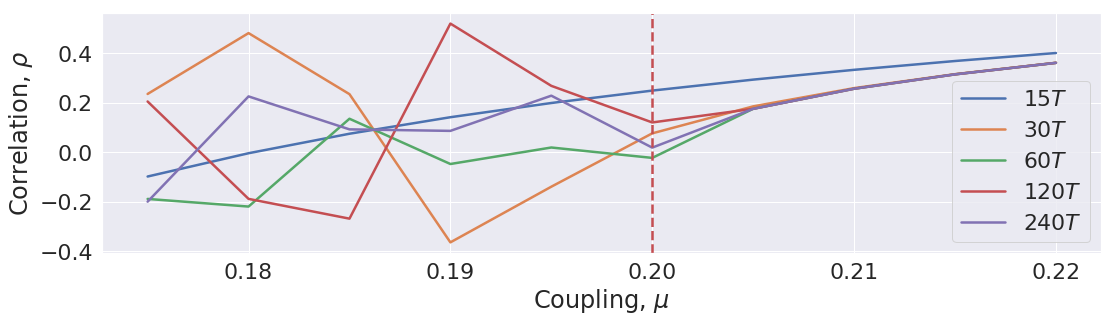

In [14]:
plt.figure(figsize=(16,5))
plt.plot(d_series[35:45], C_series[35:45], label=r'$15T$')
plt.plot(d_series[35:45], C_series2[35:45], label=r'$30T$')
plt.plot(d_series[35:45], C_series3[35:45], label=r'$60T$')
plt.plot(d_series[35:45], C_series4[35:45], label=r'$120T$')
plt.plot(d_series[35:45], C_series5[35:45], label=r'$240T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()


In [15]:
dw=0.2

num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series6=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=240000
    n=480
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series6.append(np.mean(C_0_cur[-5000:]))
    
d_target6=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series6)-1):
        if (C_target[i]>=C_series6[j]) and (C_target[i]<=C_series6[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target6.append(np.nan)
    else:
        d_target6.append(max(d_target_cur))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

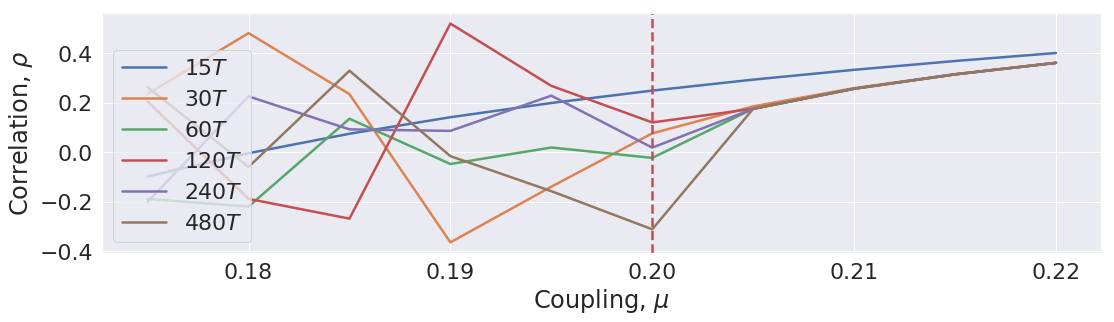

In [16]:
plt.figure(figsize=(16,5))
plt.plot(d_series[35:45], C_series[35:45], label=r'$15T$')
plt.plot(d_series[35:45], C_series2[35:45], label=r'$30T$')
plt.plot(d_series[35:45], C_series3[35:45], label=r'$60T$')
plt.plot(d_series[35:45], C_series4[35:45], label=r'$120T$')
plt.plot(d_series[35:45], C_series5[35:45], label=r'$240T$')
plt.plot(d_series[35:45], C_series6[35:45], label=r'$480T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()


In [0]:
argrelextrema(rPart, np.less)[0][-6]:argrelextrema(rPart, np.less)[0][-1]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

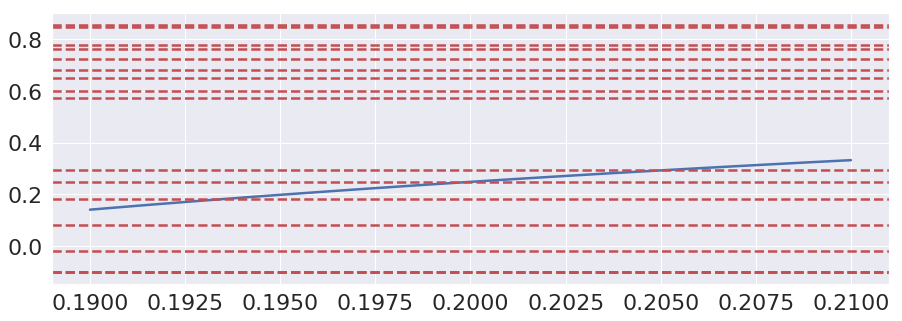

In [18]:
dw=0.2

#!!!!
C_target.append(-0.1)

num=51
d_series=np.linspace(0.19, 0.21, num)
T_series=[]
C_series=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=7500
    n=15
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
    T_series.append(T)
    C_series.append(np.mean(C_0_cur))
    
plt.figure(figsize=(15,5))
plt.plot(d_series, C_series)
for i in range(len(C_target)):
    plt.axhline(y=C_target[i], color='r', linestyle='--')
    

    
dw=0.2

#num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series2=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=15000
    n=30
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
 #   T_series.append(T)
    C_series2.append(np.mean(C_0_cur))
    
    
dw=0.2

#num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series3=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=30000
    n=60
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series3.append(np.mean(C_0_cur))
    
dw=0.2

#num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series5=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=120000
    n=240
    
    t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series5.append(np.mean(C_0_cur[-5000:]))
    
        
dw=0.2

#num=101
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series6=[]
for i in range(num):
    d=d_series[i]
    #dw=0.05
    beta=0
    eps=0
    dd=0
    N_grid=240000
    n=480
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(argrelextrema(x, np.less)[0][-6], argrelextrema(x, np.less)[0][-2], 1)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series6.append(np.mean(C_0_cur[-5000:]))
    


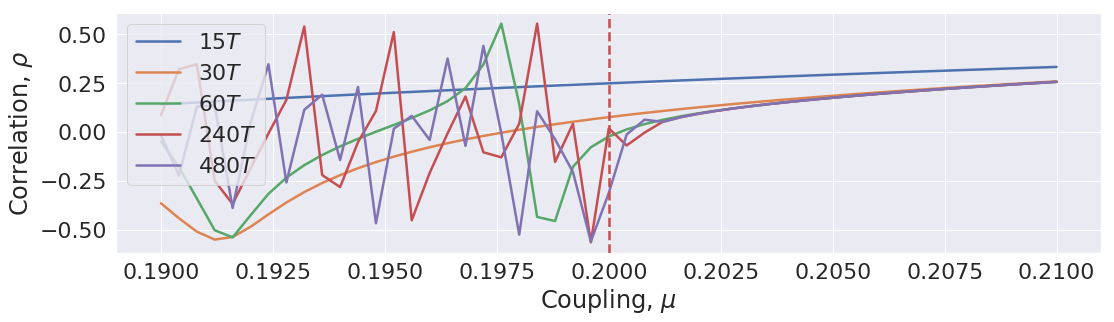

In [22]:
plt.figure(figsize=(16,5))
plt.plot(d_series, C_series, label=r'$15T$')
plt.plot(d_series, C_series2, label=r'$30T$')
plt.plot(d_series, C_series3, label=r'$60T$')
#plt.plot(d_series, C_series4, label=r'$120T$')
plt.plot(d_series, C_series5, label=r'$240T$')
plt.plot(d_series, C_series6, label=r'$480T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()


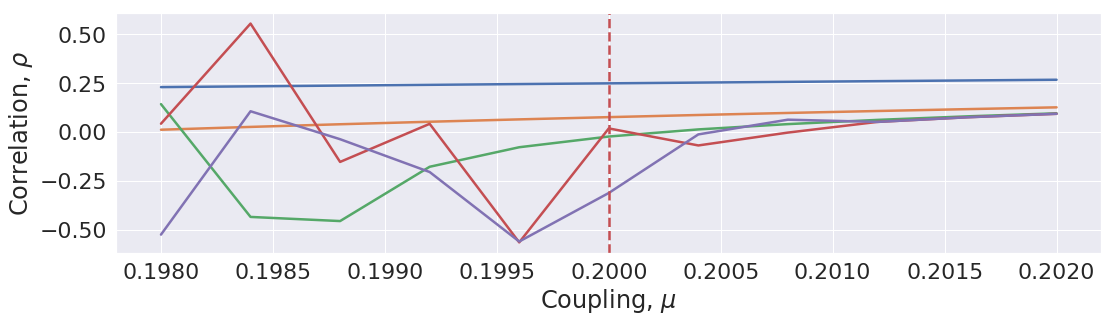

In [25]:
plt.figure(figsize=(16,5))
plt.plot(d_series[20:31], C_series[20:31], label=r'$15T$')
plt.plot(d_series[20:31], C_series2[20:31], label=r'$30T$')
plt.plot(d_series[20:31], C_series3[20:31], label=r'$60T$')
#plt.plot(d_series, C_series4, label=r'$120T$')
plt.plot(d_series[20:31], C_series5[20:31], label=r'$240T$')
plt.plot(d_series[20:31], C_series6[20:31], label=r'$480T$')
#for i in range(len(C_target)):
#    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
#plt.legend()
plt.xlabel(r'Coupling, $\mu$')
plt.ylabel(r'Correlation, $\rho$')
plt.tight_layout()


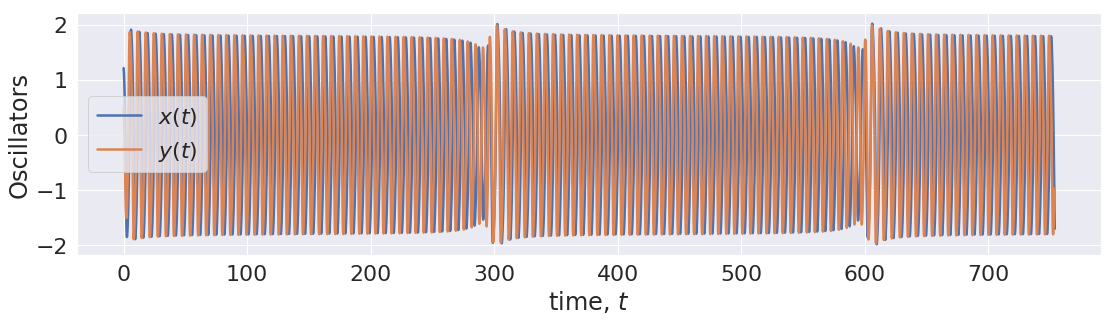

In [26]:
dw=0.2
d=0.2
beta=0
eps=0
dd=0
N_grid=120000
n=240

t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)

plt.figure(figsize=(16,5))
plt.plot(t, x, label=r'$x(t)$')
plt.plot(t, y, label=r'$y(t)$')
plt.xlabel(r'time, $t$')
plt.ylabel(r'Oscillators')
plt.legend()
plt.tight_layout()


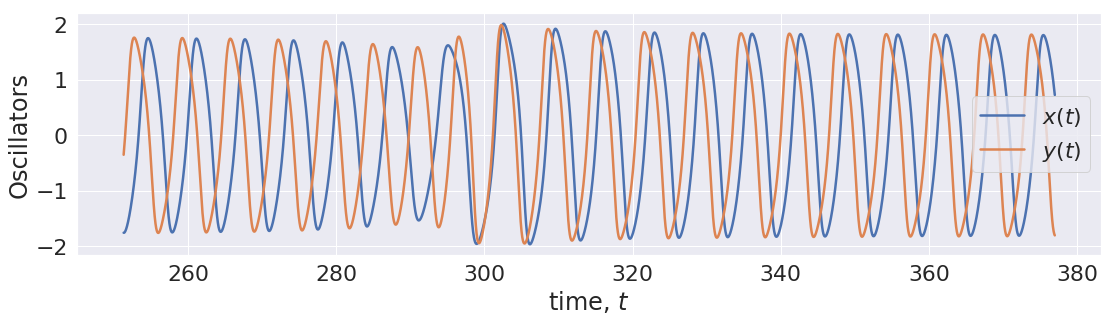

In [27]:
plt.figure(figsize=(16,5))
plt.plot(t[40000:60000], x[40000:60000], label=r'$x(t)$')
plt.plot(t[40000:60000], y[40000:60000], label=r'$y(t)$')
plt.xlabel(r'time, $t$')
plt.ylabel(r'Oscillators')
plt.legend()
plt.tight_layout()


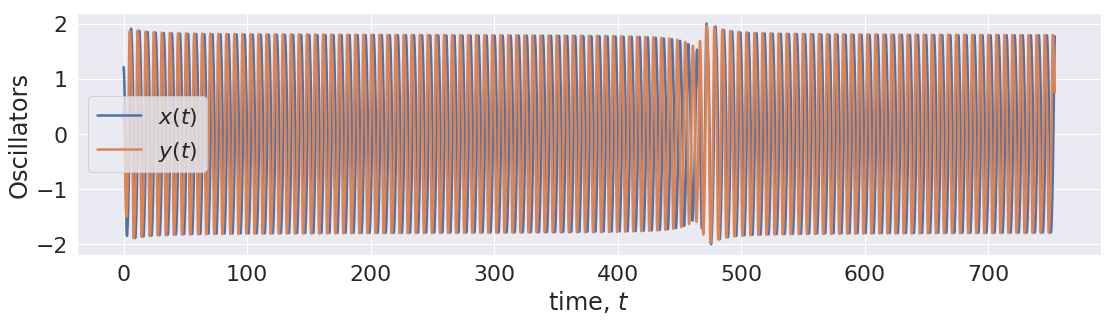

In [28]:
dw=0.2
d=0.2005
beta=0
eps=0
dd=0
N_grid=120000
n=240

t, x, dx, y, dy, T, W, p=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)

plt.figure(figsize=(16,5))
plt.plot(t, x, label=r'$x(t)$')
plt.plot(t, y, label=r'$y(t)$')
plt.xlabel(r'time, $t$')
plt.ylabel(r'Oscillators')
plt.legend()
plt.tight_layout()


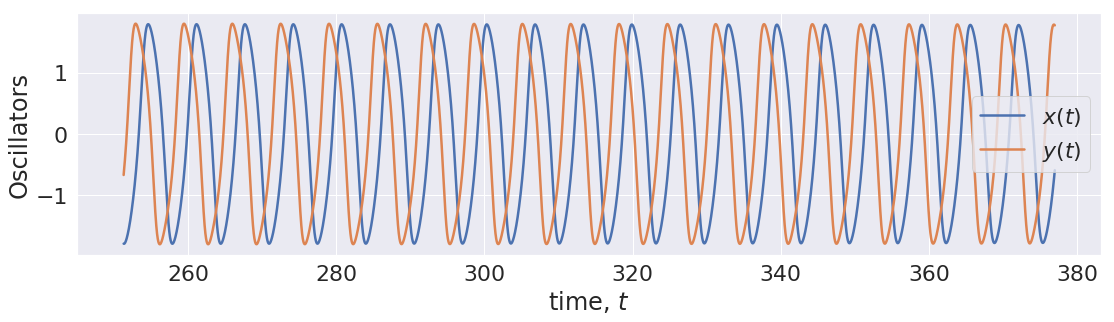

In [29]:
plt.figure(figsize=(16,5))
plt.plot(t[40000:60000], x[40000:60000], label=r'$x(t)$')
plt.plot(t[40000:60000], y[40000:60000], label=r'$y(t)$')
plt.xlabel(r'time, $t$')
plt.ylabel(r'Oscillators')
plt.legend()
plt.tight_layout()
